# La méthode des multiplicateurs de Lagrange

## À quoi ça sert ?

À trouver les extremums (minimums, maximums) d'une fonction $f$ d'une ou plusieurs variables $x_1, \dots, x_n$, sous réserve que l'ensemble solution respecte un contrainte d'égalité: $g(x_1, \dots, x_n) = 0$.
Autrement dit la méthode des multiplicateurs de Lagrange va permettre de résoudre certains problèmes d'*optimisation sous contraintes*.

Exemple: maximiser $f(x_1,x_2)$ soumise aux contraintes $g(x_1,x_2)=0$.

## Cas d'une fonction à deux variables

**TODO**: reécrire cette partie

|                                                  |                                                  |
| ------------------------------------------------ | ------------------------------------------------ |
| <img src="https://upload.wikimedia.org/wikipedia/commons/5/55/LagrangeMultipliers3D.png" width="90%"></img> | <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/b/bf/LagrangeMultipliers2D.svg/1000px-LagrangeMultipliers2D.svg.png" width="90%"></img> |

On pose la fonction:

$$
\mathcal{L}(x_1,x_2,\lambda) = f(x_1,x_2) + \lambda g(x_1,x_2)
$$

$\lambda$ est ce qu'on appelle un *multiplicateur de Lagrange* ; sa valeur n'est pas connue à priori.

Pour maximiser $\mathcal{L}$,
on annule ses dérivées partielles (condition nécessaire du premier ordre). Le problème initial revient à résoudre le système d'équations à trois inconnues suivant:

$$
\left\{
\begin{array}{rcl}
    {\large \frac{\partial\mathcal{L}(x_1,x_2,\lambda)}{\partial x_1}} & = & 0 \\
    {\large \frac{\partial\mathcal{L}(x_1,x_2,\lambda)}{\partial x_2}} & = & 0 \\
    {\large \frac{\partial\mathcal{L}(x_1,x_2,\lambda)}{\partial \lambda}} & = & 0
\end{array} \right.
$$

### Exemple

On cherche le rectangle d'aire maximum et de périmètre constant $P$.

Plus formellement, on cherche à résoudre le problème d'optimisation suivant:

$$
\begin{align}
    \max        & \quad f(x_1,x_2) = x_1 x_2          \\
    \text{s.t.} & \quad g(x_1,x_2) = 2x_1 + 2x_2 - P = 0
\end{align}
$$

avec:

* $x_1$ et $x_2$ les dimensions du rectangle (respectivement la largeur et la hauteur)
* $f(x_1,x_2) = x_1 x_2$ l'aire du rectangle (la fonction à maximiser)
* $g(x_1,x_2) = 2x_1 + 2x_2 - P = 0$ la contrainte sur le périmètre du rectangle ($2x_1 + 2x_2 = P$)

La fonction de Lagrange correspondant à ce problème est:

$$
\mathcal{L}(x_1,x_2,\lambda) = x_1 x_2 + \lambda (2x_1 + 2x_2 - P)
$$

Les conditions du premier ordre (annulation des dérivées premières) sont données par:

$$
\begin{align}
\left\{
\begin{array}{rcl}
    {\large \frac{\partial\mathcal{L}(x_1,x_2,\lambda)}{\partial x_1}} & = & 0 \\
    {\large \frac{\partial\mathcal{L}(x_1,x_2,\lambda)}{\partial x_2}} & = & 0 \\
    {\large \frac{\partial\mathcal{L}(x_1,x_2,\lambda)}{\partial \lambda}} & = & 0
\end{array} \right.
& \Leftrightarrow
\left\{
\begin{array}{rcl}
    x_2 + 2 \lambda & = & 0 \\
    x_1 + 2 \lambda & = & 0 \\
    2x_1 + 2x_2 - P & = & 0
\end{array} \right. \\
& \\
& \Leftrightarrow
\left\{
\begin{array}{rcl}
    \color{red} \lambda & \color{red} = & {\color{red} {\large \frac{-x_2}{2}}} \\
    \color{red} \lambda & \color{red} = & {\color{red} {\large \frac{-x_1}{2}}} \\
    2x_1 + 2x_2 - P & = & 0
\end{array} \right. \\
& \\
& \Leftrightarrow
\left\{
\begin{array}{rcl}
    x_1 & = & x_2 \\
    2x_1 + 2x_2 - P & = & 0
\end{array} \right. \\
& \\
& \Leftrightarrow
\left\{
\begin{array}{rcl}
    x_1 & = & x_2 \\
      P & = & 2x_1 + 2x_1 = 4x_1 = 4x_2
\end{array} \right.
\end{align}
$$

On a donc ${\large \frac{-x_2}{2}} = {\large \frac{-x_1}{2}}$ c'est à dire $x_1 = x_2$.
Ainsi, le carré ($x_1 = x_2$) est le rectangle d'aire maximum pour un périmètre donné $P$.

Remarque: il est préférable d'éliminer $\lambda$ dés le début des calculs car c'est une variable auxiliaire dont la valeur n'est pas utile.

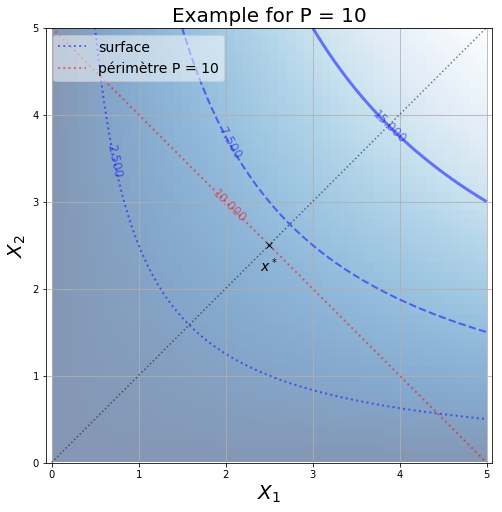

In [52]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

# Build datas ###############

P = 10
x = np.linspace(0., 5.0, 50)
y = np.linspace(0., 5.0, 50)
X, Y = np.meshgrid(x, y)

Z1 = X * Y
Z2 = 2 * X + 2 * Y

# Plot data #################

fig, ax = plt.subplots(figsize=(8,8))

# SURFACE ###################

ax.imshow(Z1,
          origin='lower',
          extent=(0,5,0,5),
          alpha=0.5,
          cmap='Blues_r')

max_value = np.max(Z1)
levels = np.array([0.1*max_value, 0.3*max_value, 0.6*max_value])

cs = plt.contour(x, y, Z1, levels,
                 linewidths=(2, 2, 3), linestyles=('dotted', 'dashed', 'solid'),
                 alpha=0.5, colors='blue')
ax.clabel(cs, inline=False, fontsize=12)

# Set legend ################

lines = [ cs.collections[0]]
labels = ['surface']

# PERIMETRE #################

levels = np.array([P])

cs = plt.contour(x, y, Z2, levels,
                 linewidths=(2, 2, 3), linestyles=('dotted', 'dashed', 'solid'),
                 alpha=0.5, colors='red')
ax.clabel(cs, inline=False, fontsize=12)

# Set title and labels ######

ax.axis('equal')              # <- SAME SCALE ON X AND Y
ax.set_title("Example for P = " + str(P), fontsize=20)
ax.set_xlabel(r"$X_1$", fontsize=20)
ax.set_ylabel(r"$X_2$", fontsize=20)

# Set legend ################

lines.append(cs.collections[0])
labels.append('périmètre P = ' + str(P))

ax.legend(lines, labels, prop={'size': 14}, loc='best', fancybox=True, framealpha=0.5)

# The optimal point #########

ax.plot([0, 5], [0, 5], ":k", alpha=0.5)
ax.plot([2.5], [2.5], "xk")
ax.text(2.4, 2.2, r"$x^*$", fontsize=14)

# Plot ######################

plt.grid()
plt.show()

## Cas générale

**TODO**

## Bibliographie

Quelques livres sur le sujet:

- *Optimisation et contrôle des systèmes linéaires* (chapitre 3) de Maïtine Bergounioux aux editions Dunod
- *Toutes les mathématiques et les bases de l'informatique* (p. 566-567) de Horst Stöcker aux editions Dunod

Quelques liens intéressants:

- https://fr.wikipedia.org/wiki/Multiplicateur_de_Lagrange
- https://en.wikipedia.org/wiki/Lagrange_multiplier


- http://www.unicaen.fr/ufr/eco/espaceprof/script1/script2/identification/valognes_fabrice/MicroL3/ch02.pdf (bien pour une première approche)
- https://economix.fr/docs/1041/Rappels%20Lagrange.pdf (facile d'accès, vu sous l'angle des science économiques)
- https://quantique.u-strasbg.fr/lib/exe/fetch.php?media=fr:pageperso:vr:fichiers:multiplicateur-lagrange.pdf
- https://ufr-segmi.parisnanterre.fr/servlet/com.univ.collaboratif.utils.LectureFichiergw?ID_FICHIER=1348818743690
- http://nlp.cs.berkeley.edu/tutorials/lagrange-multipliers.pdf
- http://res-nlp.univ-lemans.fr/NLP_C_M03_G03/co/Contenu_601.html (vu sous l'angle de la pyhsique)

**TODO**: hide this cell

https://www.google.fr/webhp?ie=utf-8&oe=utf-8&client=firefox-b&gfe_rd=cr&ei=kutIWYeiKoXS8Afc25yQBQ#safe=active&q=m%C3%A9thode+des+multiplicateurs+de+lagrange